In [1]:
!pip install torch torchvision timm matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from timm import create_model
from tqdm import tqdm

In [3]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 20
num_classes = 2

In [4]:
# Device
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

In [6]:
#dataset_path
dataset_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset"
train_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/train"
val_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/val"


In [7]:
from timm import create_model
model = create_model('deit_base_patch16_224', pretrained=True)
import torch.nn as nn
import torch.optim as optim

In [8]:
# Load the training and validation datasets
# The dataset should be organized in subfolders named after class labels
train_data = datasets.ImageFolder(root=train_path, transform=transform)
val_data = datasets.ImageFolder(root=val_path, transform=transform)

# Create DataLoaders to feed data in batches
# Training data is shuffled for better generalization
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
# Validation data is not shuffled — we want consistent evaluation
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Modify the final classification head of the model
# Add dropout for regularization and a linear layer for classification
model.head = nn.Sequential(
    nn.Dropout(p=0.3),  # helps reduce overfitting by randomly dropping 30% of neurons
    nn.Linear(model.head.in_features, num_classes)  # output layer with correct number of classes
)

# Move the model to GPU if available, otherwise use CPU
model = model.to(device)

# Set the loss function — CrossEntropy
criterion = nn.CrossEntropyLoss()

# Set the optimizer — Adam.
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [9]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm  # adds progress bar during training

# Define where to save training results
save_path = "C:/Users/lamim/Desktop/N_Thesis/training_results4"

# Lists to keep track of loss and accuracy at each epoch
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Loop over each epoch
for epoch in range(num_epochs):
    model.train()  # put model in training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # Go through all batches in the training set
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # reset gradients

        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # compute loss

        loss.backward()  # backpropagation
        optimizer.step()  # update weights

        # Keep track of training loss and accuracy
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)  # get predicted class
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

    # Calculate average training loss and accuracy
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_preds / total_preds
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    # Validation phase (no gradient updates here)
    model.eval()  # turn off dropout, etc.
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():  # no need to track gradients during validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_accuracy = correct_preds / total_preds
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# Save all results in a CSV for easy tracking or plotting later
df = pd.DataFrame({
    'Epoch': list(range(1, num_epochs + 1)),
    'Training Loss': train_losses,
    'Validation Loss': val_losses,
    'Training Accuracy': train_accuracies,
    'Validation Accuracy': val_accuracies
})

csv_path = f"{save_path}/training_results.csv"
df.to_csv(csv_path, index=False)  # save without the DataFrame index
print(f"Results saved to {csv_path}")

 66%|█████████████████████████████████████████████████████▋                            | 19/28 [00:16<00:08,  1.20it/s]C:\Users\lamim\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:23<00:00,  1.24it/s]


Epoch 1/20, Loss: 0.9897, Accuracy: 0.6398
Validation Accuracy: 0.5375, Validation Loss: 0.6772


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:22<00:00,  1.28it/s]


Epoch 2/20, Loss: 0.6543, Accuracy: 0.6177
Validation Accuracy: 0.5554, Validation Loss: 0.6232


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.36it/s]


Epoch 3/20, Loss: 0.6138, Accuracy: 0.6564
Validation Accuracy: 0.6000, Validation Loss: 0.6242


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.49it/s]


Epoch 4/20, Loss: 0.6058, Accuracy: 0.6498
Validation Accuracy: 0.6536, Validation Loss: 0.9116


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.40it/s]


Epoch 5/20, Loss: 0.6047, Accuracy: 0.6619
Validation Accuracy: 0.5643, Validation Loss: 0.6316


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.41it/s]


Epoch 6/20, Loss: 0.5861, Accuracy: 0.6885
Validation Accuracy: 0.5732, Validation Loss: 0.6398


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.41it/s]


Epoch 7/20, Loss: 0.6573, Accuracy: 0.6122
Validation Accuracy: 0.5554, Validation Loss: 0.6023


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.42it/s]


Epoch 8/20, Loss: 0.6231, Accuracy: 0.6542
Validation Accuracy: 0.6536, Validation Loss: 0.6164


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.42it/s]


Epoch 9/20, Loss: 0.5312, Accuracy: 0.7637
Validation Accuracy: 0.6536, Validation Loss: 0.6219


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.42it/s]


Epoch 10/20, Loss: 0.6360, Accuracy: 0.6686
Validation Accuracy: 0.6625, Validation Loss: 0.7117


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.39it/s]


Epoch 11/20, Loss: 0.5464, Accuracy: 0.7482
Validation Accuracy: 0.7607, Validation Loss: 0.5608


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.42it/s]


Epoch 12/20, Loss: 0.5135, Accuracy: 0.7560
Validation Accuracy: 0.6893, Validation Loss: 0.7647


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.45it/s]


Epoch 13/20, Loss: 0.5599, Accuracy: 0.7482
Validation Accuracy: 0.6625, Validation Loss: 0.7964


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.44it/s]


Epoch 14/20, Loss: 0.6595, Accuracy: 0.8179
Validation Accuracy: 0.7429, Validation Loss: 0.6026


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.40it/s]


Epoch 15/20, Loss: 0.6192, Accuracy: 0.8489
Validation Accuracy: 0.7161, Validation Loss: 0.6159


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.40it/s]


Epoch 16/20, Loss: 0.3898, Accuracy: 0.8577
Validation Accuracy: 0.7250, Validation Loss: 0.6216


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:21<00:00,  1.38it/s]


Epoch 17/20, Loss: 0.3838, Accuracy: 0.8754
Validation Accuracy: 0.7429, Validation Loss: 0.5765


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.40it/s]


Epoch 18/20, Loss: 0.3634, Accuracy: 0.8942
Validation Accuracy: 0.7786, Validation Loss: 0.5913


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:20<00:00,  1.43it/s]


Epoch 19/20, Loss: 0.3667, Accuracy: 0.8909
Validation Accuracy: 0.7339, Validation Loss: 0.6645


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:19<00:00,  1.46it/s]


Epoch 20/20, Loss: 0.3853, Accuracy: 0.8677
Validation Accuracy: 0.7161, Validation Loss: 0.5687
Results saved to C:/Users/lamim/Desktop/N_Thesis/training_results4/training_results.csv


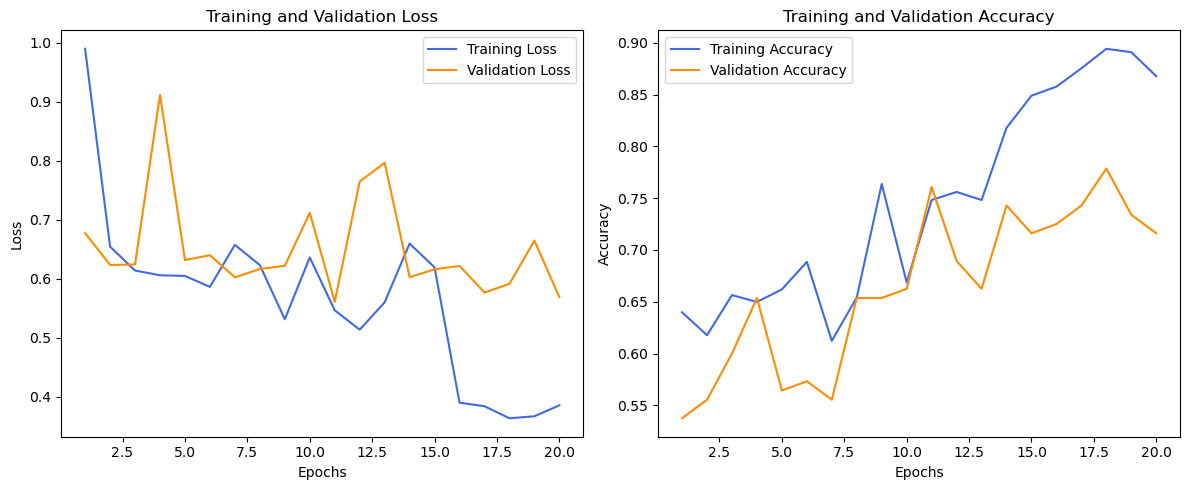

In [10]:
# Plot training and validation accuracy and loss
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Save the plot
plot_path = f"{save_path}/training_plots.png"
plt.savefig(plot_path)
plt.show()
print(f"Plots saved to {plot_path}")


In [11]:
test_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset/test"
# Load the test dataset
test_data = datasets.ImageFolder(root=test_path, transform=transform)

# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

model.eval()

# Initialize tracking variables
test_loss = 0.0
correct_preds = 0
total_preds = 0

# No need to compute gradients for test evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Get predictions
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)

# Compute final loss and accuracy
test_loss /= len(test_loader)
test_accuracy = correct_preds / total_preds

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Test Accuracy: 0.7047, Test Loss: 0.5979


In [12]:
test_labels, test_preds = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        test_labels.extend(labels.cpu().numpy())  # Store true labels
        test_preds.extend(predicted.cpu().numpy())  # Store predicted labels

# Compute metrics for test set
test_precision = precision_score(test_labels, test_preds, average="macro")
test_recall = recall_score(test_labels, test_preds, average="macro")
test_f1 = f1_score(test_labels, test_preds, average="macro")

print(f"Test Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")

Test Precision: 0.6999, Recall: 0.6934